# Figures 14 Weeks CFD Course
## Week 01


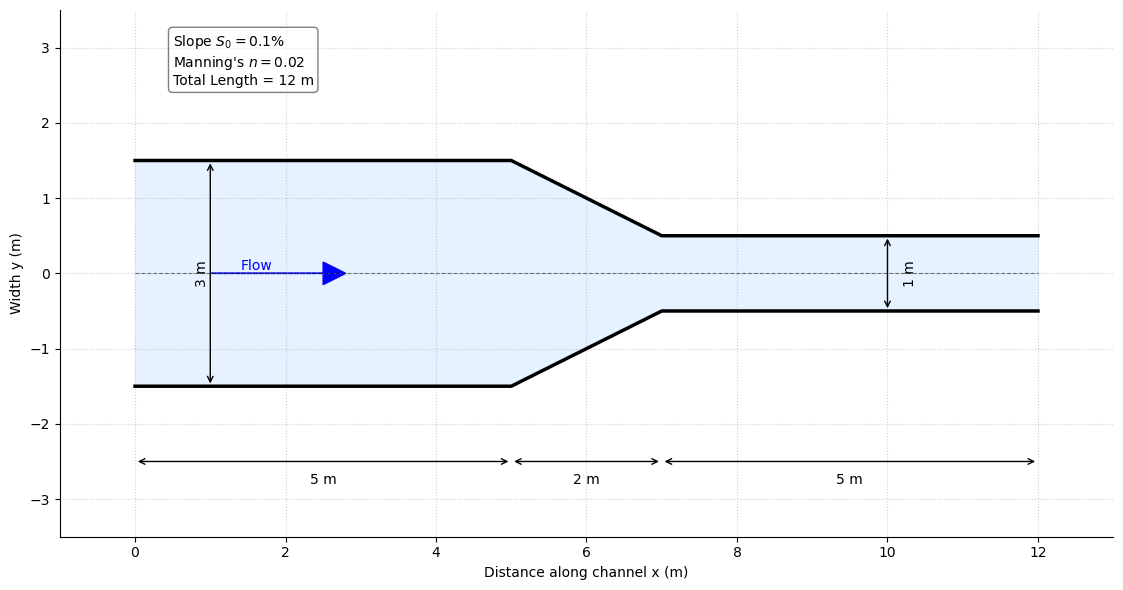

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_channel_configuration():
    # Setup Figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Define Geometry coordinates (x, y_top, y_bottom)
    # Centerline is at y=0
    # Section 1: Upstream (Length 5, Width 3 -> Half-width 1.5)
    x1 = [0, 5]
    y1 = [1.5, 1.5]
    
    # Section 2: Contraction (Length 2, Width 3 to 1 -> Half-width 1.5 to 0.5)
    x2 = [5, 7]
    y2 = [1.5, 0.5]
    
    # Section 3: Downstream (Length 5, Width 1 -> Half-width 0.5)
    x3 = [7, 12]
    y3 = [0.5, 0.5]
    
    # Combine coordinates for plotting top wall
    x_all = x1 + x2[1:] + x3[1:]
    y_top = y1 + y2[1:] + y3[1:]
    # Bottom wall is just negative of top
    y_bot = [-y for y in y_top]
    
    # Plot Walls
    ax.plot(x_all, y_top, 'k-', linewidth=2.5, label='Channel Walls')
    ax.plot(x_all, y_bot, 'k-', linewidth=2.5)
    
    # Fill Water (Light Blue)
    ax.fill_between(x_all, y_top, y_bot, color='#e6f2ff', alpha=1)
    
    # Centerline
    ax.plot([0, 12], [0, 0], 'k--', linewidth=0.8, alpha=0.5, label='Centerline')

    # Add Dimensions and Text
    # 1. Lengths (Bottom)
    ax.annotate('', xy=(0, -2.5), xytext=(5, -2.5), arrowprops=dict(arrowstyle='<->'))
    ax.text(2.5, -2.8, '5 m', ha='center')
    
    ax.annotate('', xy=(5, -2.5), xytext=(7, -2.5), arrowprops=dict(arrowstyle='<->'))
    ax.text(6, -2.8, '2 m', ha='center')
    
    ax.annotate('', xy=(7, -2.5), xytext=(12, -2.5), arrowprops=dict(arrowstyle='<->'))
    ax.text(9.5, -2.8, '5 m', ha='center')

    # 2. Widths (Inside channel or side)
    # Upstream Width
    ax.annotate('', xy=(1, -1.5), xytext=(1, 1.5), arrowprops=dict(arrowstyle='<->'))
    ax.text(.80, 0, '3 m', va='center', rotation=90)
    
    # Downstream Width
    ax.annotate('', xy=(10, -0.5), xytext=(10, 0.5), arrowprops=dict(arrowstyle='<->'))
    ax.text(10.2, 0, '1 m', va='center', rotation=90)

    # 3. Flow Arrow
    ax.arrow(1, 0, 1.5, 0, head_width=0.3, head_length=0.3, fc='blue', ec='blue')
    ax.text(1.4, 0.05, 'Flow', color='blue')

    # 4. Parameters Text Box
    textstr = '\n'.join((
        r'Slope $S_0 = 0.1\%$',
        r"Manning's $n = 0.02$",
        r'Total Length = 12 m'
    ))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.5, 2.5, textstr, fontsize=10, bbox=props)

    # Styling
    ax.set_xlim(-1, 13)
    ax.set_ylim(-3.5, 3.5)
    ax.set_aspect('equal') # Crucial for geometric accuracy
    ax.set_xlabel('Distance along channel x (m)')
    ax.set_ylabel('Width y (m)')
    # ax.set_title('Plan View: Hydraulic Channel Configuration')
    ax.grid(True, linestyle=':', alpha=0.6)
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

draw_channel_configuration()

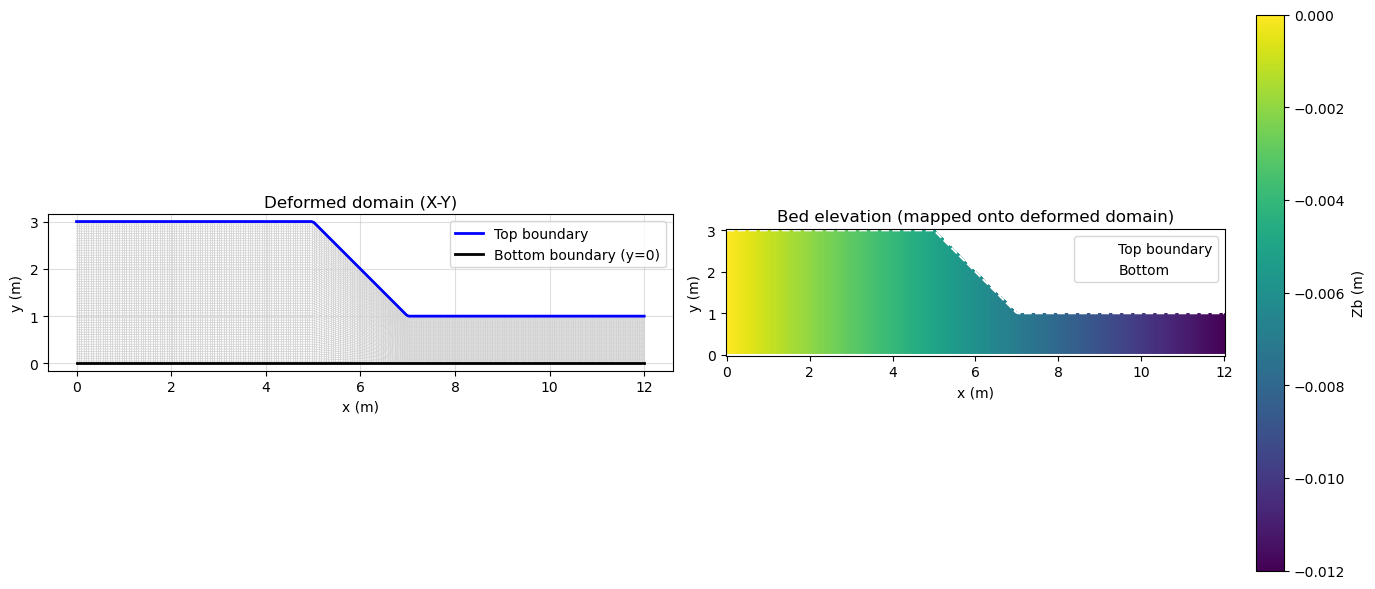

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain dimensions
L_up     = 5.0
L_trans  = 2.0
L_down   = 5.0
L_total  = L_up + L_trans + L_down

W_up     = 3.0
W_down   = 1.0

# Grid resolution
nx = 240
ny = 60

# Computational (deformed) coordinates
x = np.linspace(0.0, L_total, nx)
y_star = np.linspace(0.0, 1.0, ny)

X, Y_star = np.meshgrid(x, y_star)

# Smooth width function
def width(x):
    W = np.where(
        x < L_up,
        W_up,
        np.where(
            x < L_up + L_trans,
            W_up + (W_down - W_up) * (x - L_up) / L_trans,
            W_down
        )
    )
    return W

# Apply deformation
W_x = width(X)
Y = W_x * Y_star

# Bed elevation (linear slope)
S0 = 0.001
Zb = -S0 * X

# --- Plot final deformed domain ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: deformed mesh (X vs Y)
# plot a subset of mesh lines for clarity
for j in range(0, ny):
    ax1.plot(X[j, :], Y[j, :], color='lightgray', linewidth=0.6)
for i in range(0, nx):
    ax1.plot(X[:, i], Y[:, i], color='lightgray', linewidth=0.6)

# top and bottom boundaries
ax1.plot(x, Y[-1, :], 'b-', linewidth=2, label='Top boundary')
ax1.plot(x, Y[0, :], 'k-', linewidth=2, label='Bottom boundary (y=0)')

ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Deformed domain (X-Y)')
ax1.set_aspect('equal')
ax1.legend()
ax1.grid(alpha=0.4)

# Right: bed elevation mapped onto deformed domain
pcm = ax2.pcolormesh(X, Y, Zb, shading='auto', cmap='viridis')
ax2.plot(x, Y[-1, :], 'w--', linewidth=1.5, label='Top boundary')
ax2.plot(x, Y[0, :], 'w-', linewidth=1.5, label='Bottom')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_title('Bed elevation (mapped onto deformed domain)')
ax2.set_aspect('equal')
fig.colorbar(pcm, ax=ax2, label='Zb (m)')
ax2.legend()

plt.tight_layout()
plt.show()


/var/folders/n5/0s7bp30n3nvgpspg0gj0v2c40000gp/T/ipykernel_61155/3348794065.py:66: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax2.pcolormesh(X, Y, Zb, shading='auto', cmap='viridis')


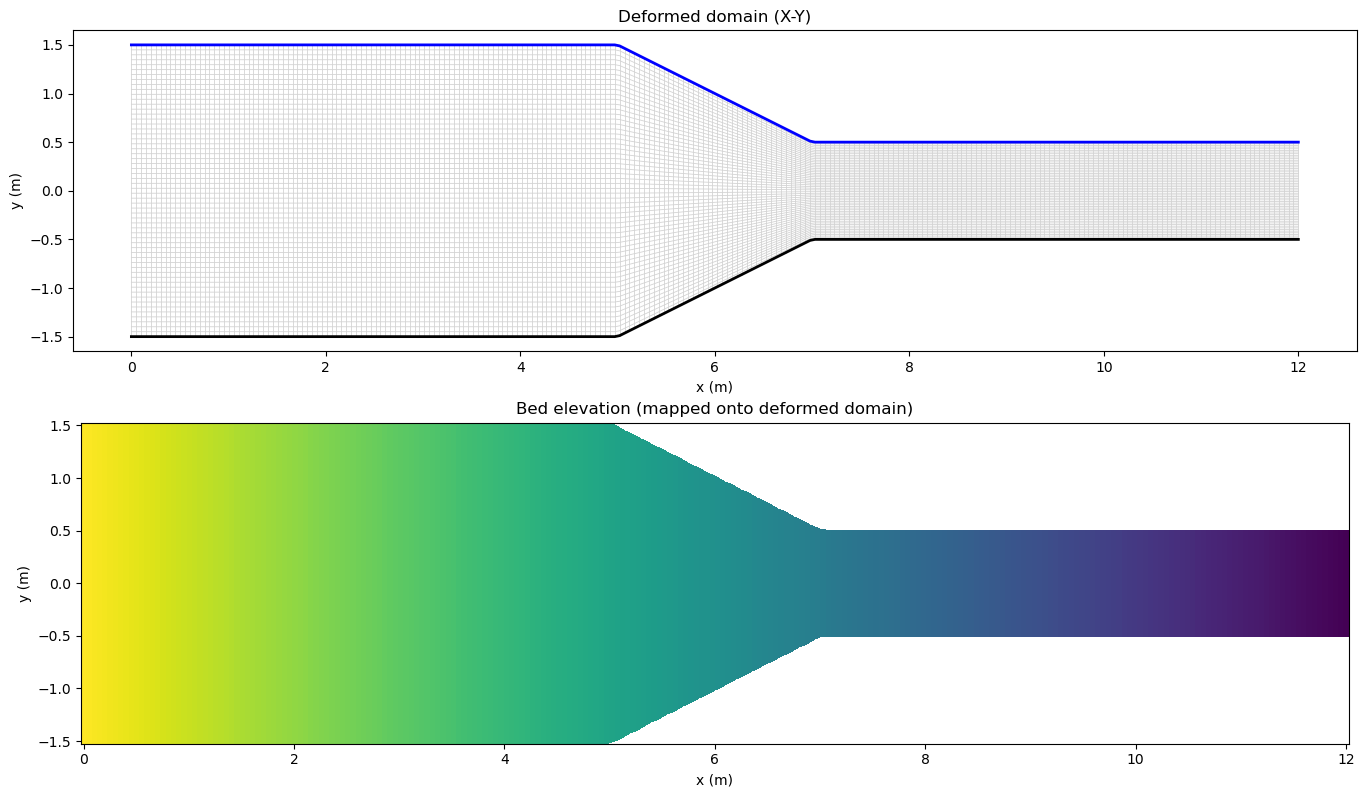

In [37]:
import numpy as np

# Domain dimensions
L_up    = 5.0
L_trans = 2.0
L_down  = 5.0
L_total = L_up + L_trans + L_down

W_up    = 3.0
W_down  = 1.0

# Grid resolution
nx = 240
ny = 60

# Computational coordinates
x = np.linspace(0.0, L_total, nx)
y_star = np.linspace(-0.5, 0.5, ny)   # centred around y = 0

X, Y_star = np.meshgrid(x, y_star)

def width(x):
    """Piecewise linear width function W(x)."""
    W = np.where(
        x < L_up,
        W_up,
        np.where(
            x < L_up + L_trans,
            W_up + (W_down - W_up) * (x - L_up) / L_trans,
            W_down
        )
    )
    return W

# Apply lateral deformation, keeping the centreline at y = 0
W_x = width(X)
Y = W_x * Y_star

# Bed elevation with constant slope S0 along x
S0 = 0.001
Zb = -S0 * X

# --- Plot final deformed domain ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Left: deformed mesh (X vs Y)
# plot a subset of mesh lines for clarity
for j in range(0, ny):
    ax1.plot(X[j, :], Y[j, :], color='lightgray', linewidth=0.6)
for i in range(0, nx):
    ax1.plot(X[:, i], Y[:, i], color='lightgray', linewidth=0.6)

# top and bottom boundaries
ax1.plot(x, Y[-1, :], 'b-', linewidth=2, label='Top boundary')
ax1.plot(x, Y[0, :], 'k-', linewidth=2, label='Bottom boundary (y=0)')

ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Deformed domain (X-Y)')
ax1.set_aspect('equal')
ax1.grid(False)
# ax1.legend()


# Right: bed elevation mapped onto deformed domain
pcm = ax2.pcolormesh(X, Y, Zb, shading='auto', cmap='viridis')
# ax2.plot(x, Y[-1, :], 'w--', linewidth=1.5, label='Top boundary')
# ax2.plot(x, Y[0, :], 'w-', linewidth=1.5, label='Bottom')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_title('Bed elevation (mapped onto deformed domain)')
ax2.set_aspect('equal')


plt.tight_layout()
plt.show()